In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

In [2]:
import sys
if "../src/" not in sys.path:
    sys.path.insert(0,"../src/")
from pbcpy.base import DirectCell, ReciprocalCell, Coord
from pbcpy.grid import DirectGrid, ReciprocalGrid
from pbcpy.field import DirectField, ReciprocalField
from pbcpy.functionals import *

%matplotlib inline
%load_ext autoreload
%autoreload 2
#

In [3]:
from pbcpy.local_functionals_utils import ThomasFermiEnergy, ThomasFermiPotential
from pbcpy.local_functionals_utils import vonWeizsackerEnergy, vonWeizsackerPotential

In [4]:
from pbcpy.formats.qepp import PP
from pbcpy.formats.xsf import XSF

In [5]:
mol = PP(filepp='Al_fde_rho.pp').read()

In [6]:
dens_real_space = mol.field

# Local and Semilocal Functionals energy and potential

In [7]:
ThomasFermi = Functional(name='TF',energydensity=ThomasFermiEnergy(dens_real_space),
                         potential=ThomasFermiPotential(dens_real_space))

In [8]:
vonWeizsacker = Functional(name='vW',energydensity=vonWeizsackerEnergy(dens_real_space),
                           potential=vonWeizsackerPotential(dens_real_space,Sigma=0.26))

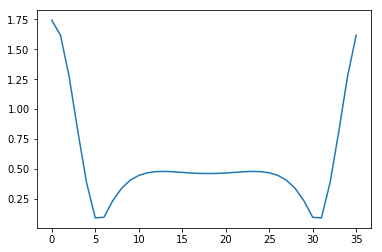

In [9]:
plt.plot(ThomasFermi.potential[:,0,0])
plt.show()

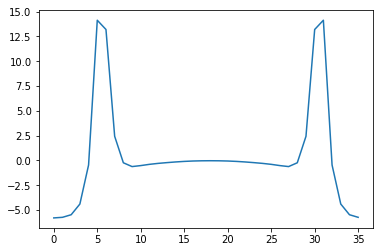

In [10]:
plt.plot(vonWeizsacker.potential[:,0,0])
plt.show()

In [11]:
TFpvW=ThomasFermi.sum(vonWeizsacker)

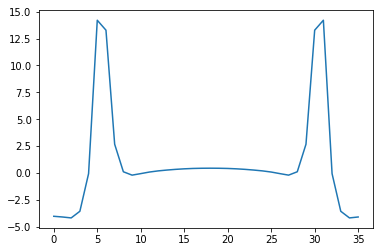

In [12]:
plt.plot(TFpvW.potential[:,0,0])
plt.show()

# $E_{Nel}$ energy and potential

In [13]:
natoms=np.shape(mol.ions)[0]

In [14]:
NuclearElectron = mol.ions[0].local_PP(grid=dens_real_space.grid,rho=dens_real_space,outfile='./Al_lda.oe01.recpot')
for i in range(1,natoms,1):
    eN_tmp = mol.ions[i].local_PP(grid=dens_real_space.grid,rho=dens_real_space,outfile='./Al_lda.oe01.recpot')
    NuclearElectron = NuclearElectron.sum(eN_tmp)

Recpot pseudopotential ./Al_lda.oe01.recpot loaded
Recpot pseudopotential ./Al_lda.oe01.recpot loaded


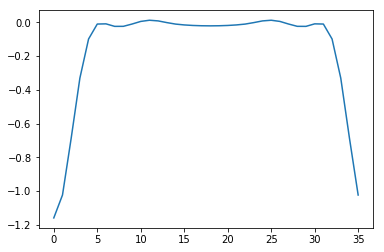

In [15]:
plt.plot(NuclearElectron.energydensity[:,0,0])
plt.show()

In [16]:
NuclearElectron.energydensity.integral()

-3.8609045849258341

In [17]:
ThomasFermi.energydensity.integral()

1.6174727743659869

In [18]:
vonWeizsacker.energydensity.integral()

1.4816062010287321